# ADA Milestone 2

Before we begin any vizualisation or analysis of data, we need to set up the environment by installing different libraries that will help us afterwards

## Useful libraries

In [43]:
import pandas as pd
import numpy as np
import ast
import missingno as msno
from geopy.geocoders import Nominatim
import geopandas as gpd
import re
import pycountry_convert as pc
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns

## Data importation

- Now that everything is set up, we can import the data. We already created a path on the Github, so we only need to import them

In [44]:
import dataframes as RAW
import cleaning as CLEAN

- We can now start to visualize all the data that we have and see what information they give us 

In [5]:
RAW.character_data.head()


,Wiki ID,Freebase ID,Release date,Character name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at release,Map ID,Character ID,Actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [6]:
RAW.character_data.describe()

,Wiki ID,Actor height,Actor age at release
count,4.506690e+05,154824.000000,292556.000000
mean,1.396975e+07,1.788893,37.788523
std,1.079662e+07,4.379940,20.587870
min,3.300000e+02,0.610000,-7896.000000
25%,3.759292e+06,1.676400,28.000000
50%,1.189065e+07,1.750000,36.000000
75%,2.366501e+07,1.830000,47.000000
max,3.750192e+07,510.000000,103.000000


In [7]:
RAW.movie_data.head()

,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
12,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ..."


In [8]:
RAW.movie_data.describe()

,Wiki ID,Release date,Revenue,Runtime
count,3.937200e+04,39372,6.793000e+03,32669.000000
mean,1.663258e+07,1978-01-24 00:35:35.202682112,5.673971e+07,95.248277
min,3.217000e+03,1892-10-28 00:00:00,1.000000e+04,0.100000
25%,5.872940e+06,1952-07-04 00:00:00,3.000000e+06,83.000000
50%,1.602267e+07,1989-01-24 00:00:00,1.486709e+07,95.000000
75%,2.625549e+07,2005-07-18 06:00:00,5.297001e+07,108.000000
max,3.747359e+07,2016-06-08 00:00:00,2.782275e+09,5700.000000
std,1.126984e+07,NaN,1.222691e+08,64.337785


- From the scraping we have performed, we were able to collect about 5,000 movie revenues that were previously not inside of the dataframe, as well as movie ratings and awards. We ended up with the following dataframe:

In [9]:
RAW.movie_data_scraped.head()

,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres,IMDb rating,Wins,Nominations
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",4.9,NaN,2.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",6.0,NaN,NaN
2,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",5.9,NaN,NaN
3,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",6.9,1.0,6.0
4,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...",5.8,NaN,NaN


In [10]:
RAW.movie_data_scraped.describe()

,Wiki ID,Revenue,Runtime,IMDb rating,Wins,Nominations
count,3.937200e+04,1.089000e+04,32669.000000,32112.000000,11472.000000,16528.000000
mean,1.663258e+07,4.149214e+07,95.248277,6.270569,6.645833,8.175762
std,1.126984e+07,9.997087e+07,64.337785,1.119103,14.732923,20.428238
min,3.217000e+03,7.400000e+01,0.100000,1.000000,1.000000,1.000000
25%,5.872940e+06,7.498058e+05,83.000000,5.600000,1.000000,1.000000
50%,1.602267e+07,6.983492e+06,95.000000,6.400000,2.000000,3.000000
75%,2.625549e+07,3.473780e+07,108.000000,7.000000,6.000000,7.000000
max,3.747359e+07,2.782275e+09,5700.000000,10.000000,389.000000,634.000000


In [11]:
RAW.character_names.head()

,Character name,Freebase ID
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn


In [12]:
RAW.character_names.describe()

,Character name,Freebase ID
count,2666,2666
unique,970,2661
top,Daffy Duck,/m/0gcy23_
freq,42,2


In [13]:
RAW.tvtropes.head()

,Character type,Character name,Movie,Freebase ID,Actor name
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


In [14]:
RAW.tvtropes.describe()

,Character type,Character name,Movie,Freebase ID,Actor name
count,501,501,501,501,501
unique,72,434,383,447,350
top,crazy_jealous_guy,Captain Jack Sparrow,Pirates of the Caribbean: Dead Man's Chest,/m/0k1xxm,Robert De Niro
freq,25,5,7,5,9


In [15]:
RAW.summaries.head()

,Wiki ID,Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [16]:
RAW.summaries.describe()

,Wiki ID
count,4.230300e+04
mean,1.497051e+07
std,1.111994e+07
min,3.300000e+02
25%,4.565802e+06
50%,1.284591e+07
75%,2.485168e+07
max,3.750192e+07


## Data cleaning

By using the MSNO library, we are able to visualise the amount of missing data inside of our dataframes. For example, displayed below is the amount of missing data (represented by the white stripes) in every column of the dataframes: 

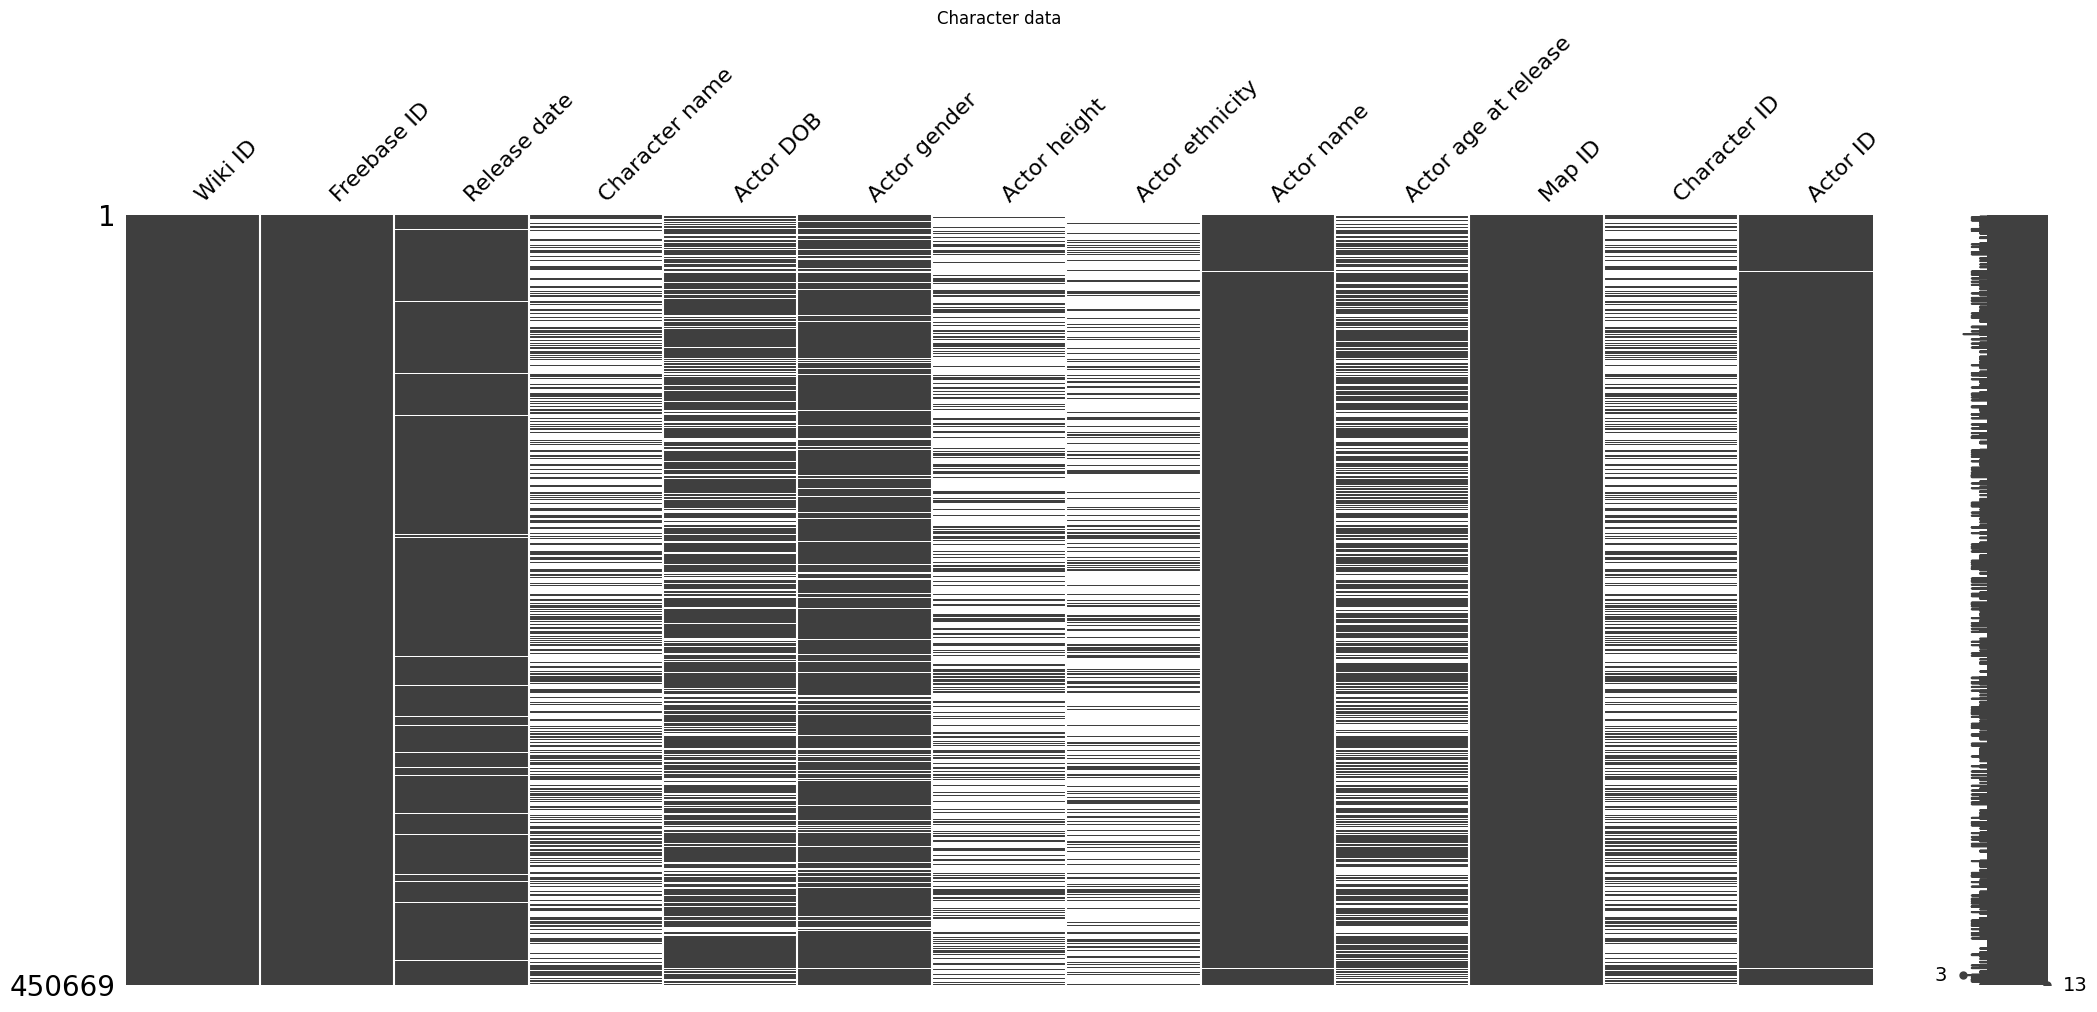

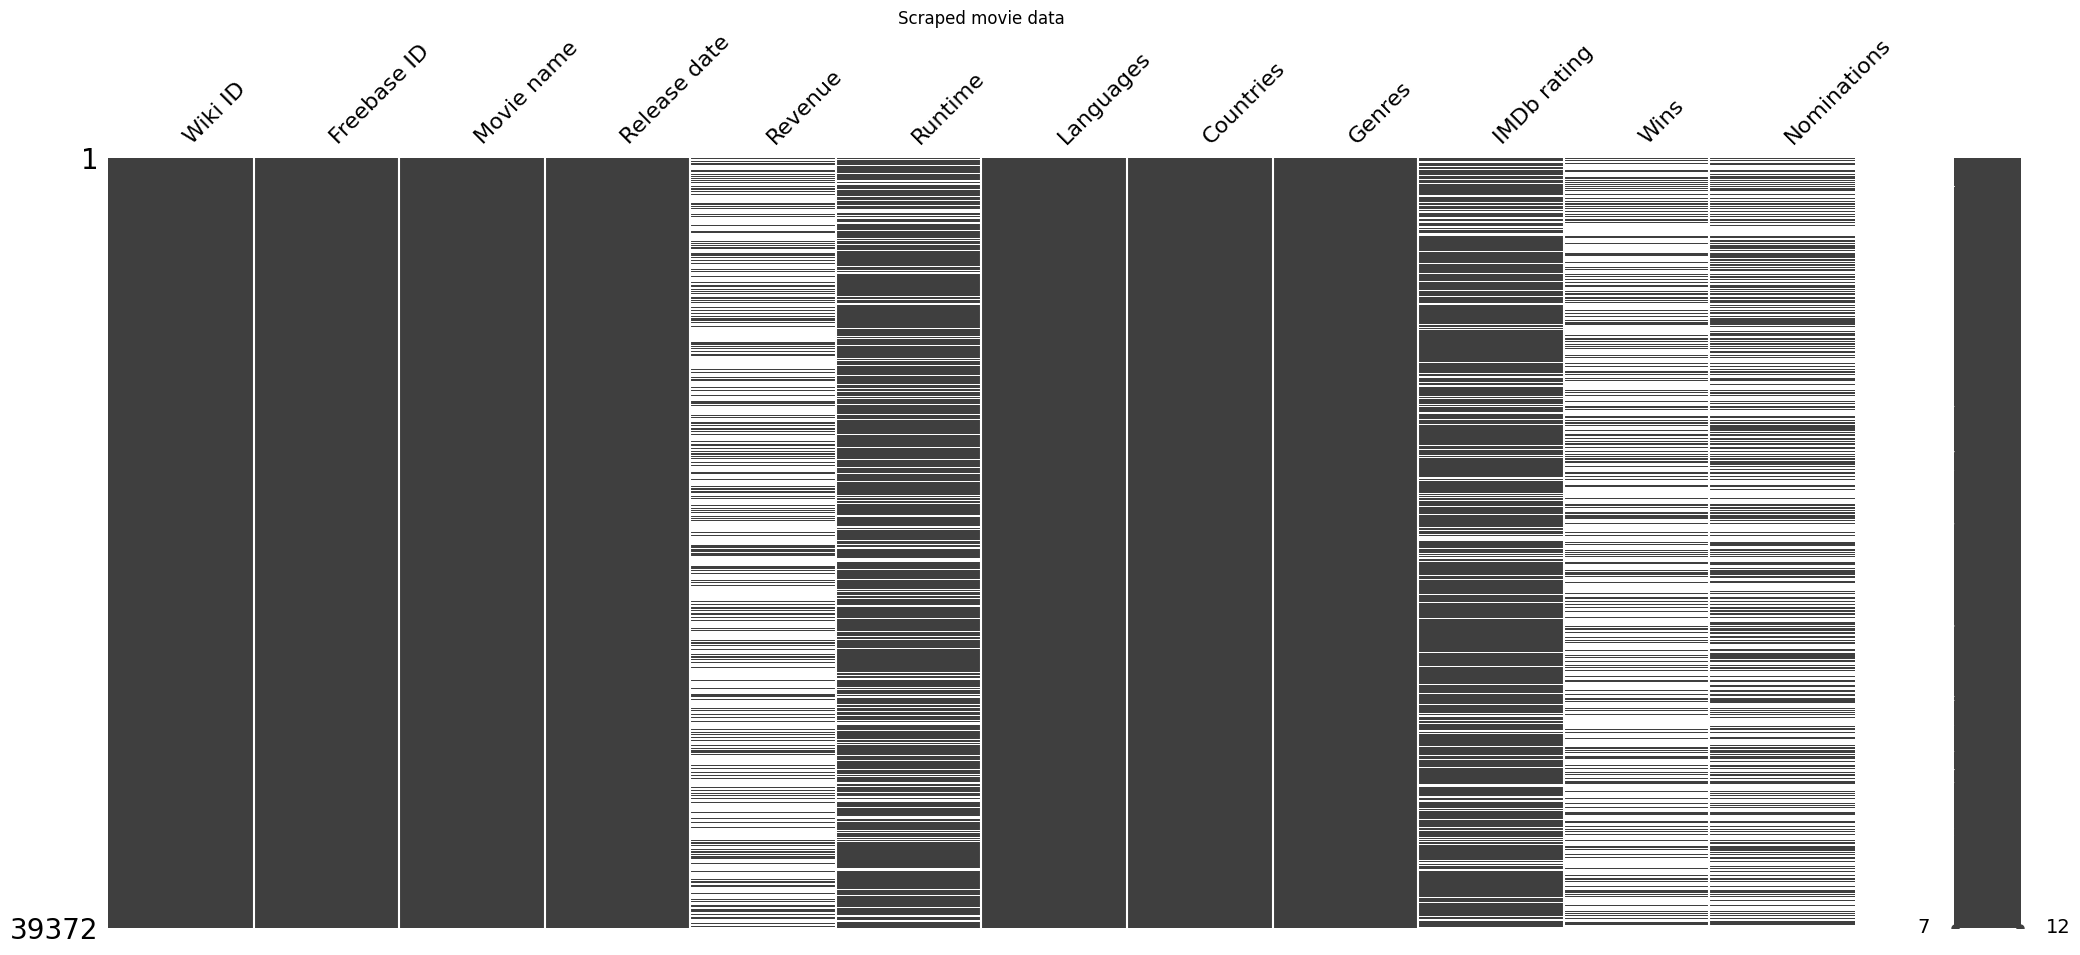

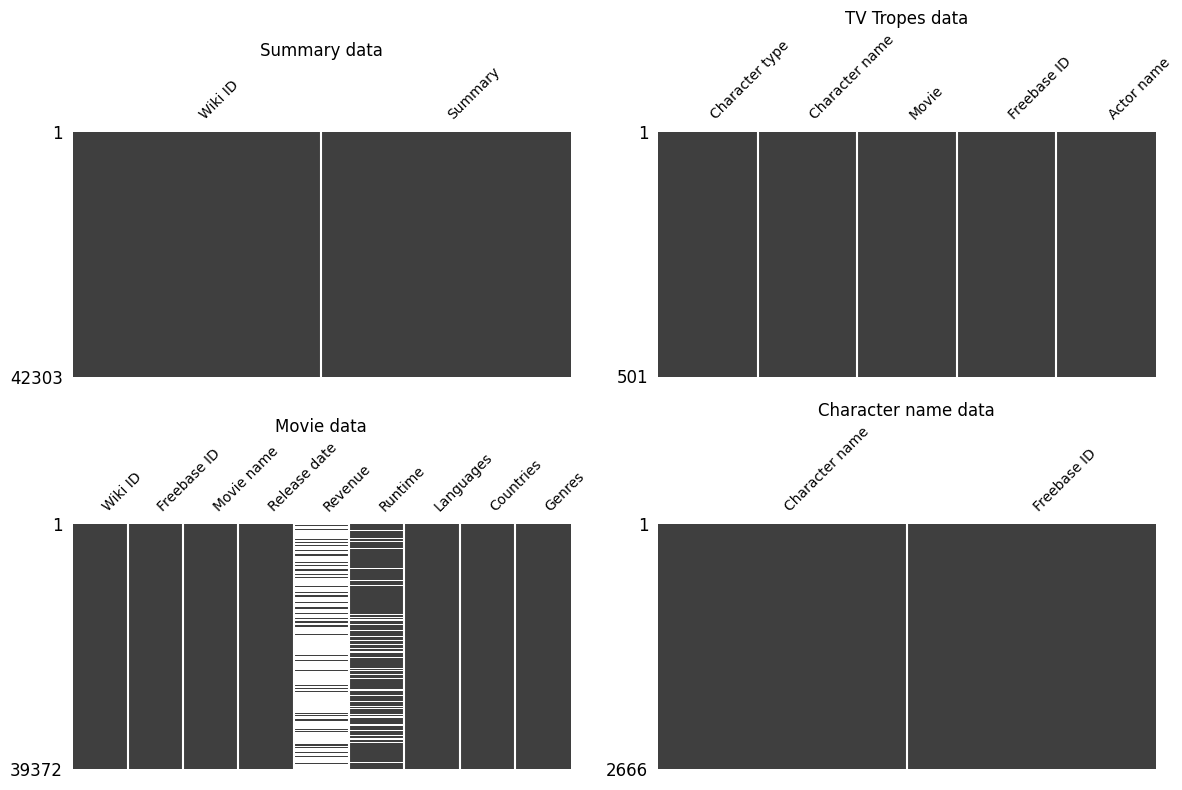

In [22]:
msno.matrix(RAW.character_data)
plt.title("Character data")
msno.matrix(RAW.movie_data_scraped)
plt.title("Scraped movie data")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot missingno matrices for each DataFrame and add titles
msno.matrix(RAW.summaries, ax=axes[0, 0], sparkline=False, fontsize=10)
axes[0, 0].set_title('Summary data')

msno.matrix(RAW.tvtropes, ax=axes[0, 1], sparkline=False, fontsize=10)
axes[0, 1].set_title('TV Tropes data')

msno.matrix(RAW.movie_data, ax=axes[1, 0], sparkline=False, fontsize=10)
axes[1, 0].set_title('Movie data')

msno.matrix(RAW.character_names, ax=axes[1, 1], sparkline=False, fontsize=10)
axes[1, 1].set_title('Character name data')

plt.tight_layout()

For summary, TV tropes and character name data, we have no missing values. For the remaining data, we will plot the percentage of missing data:

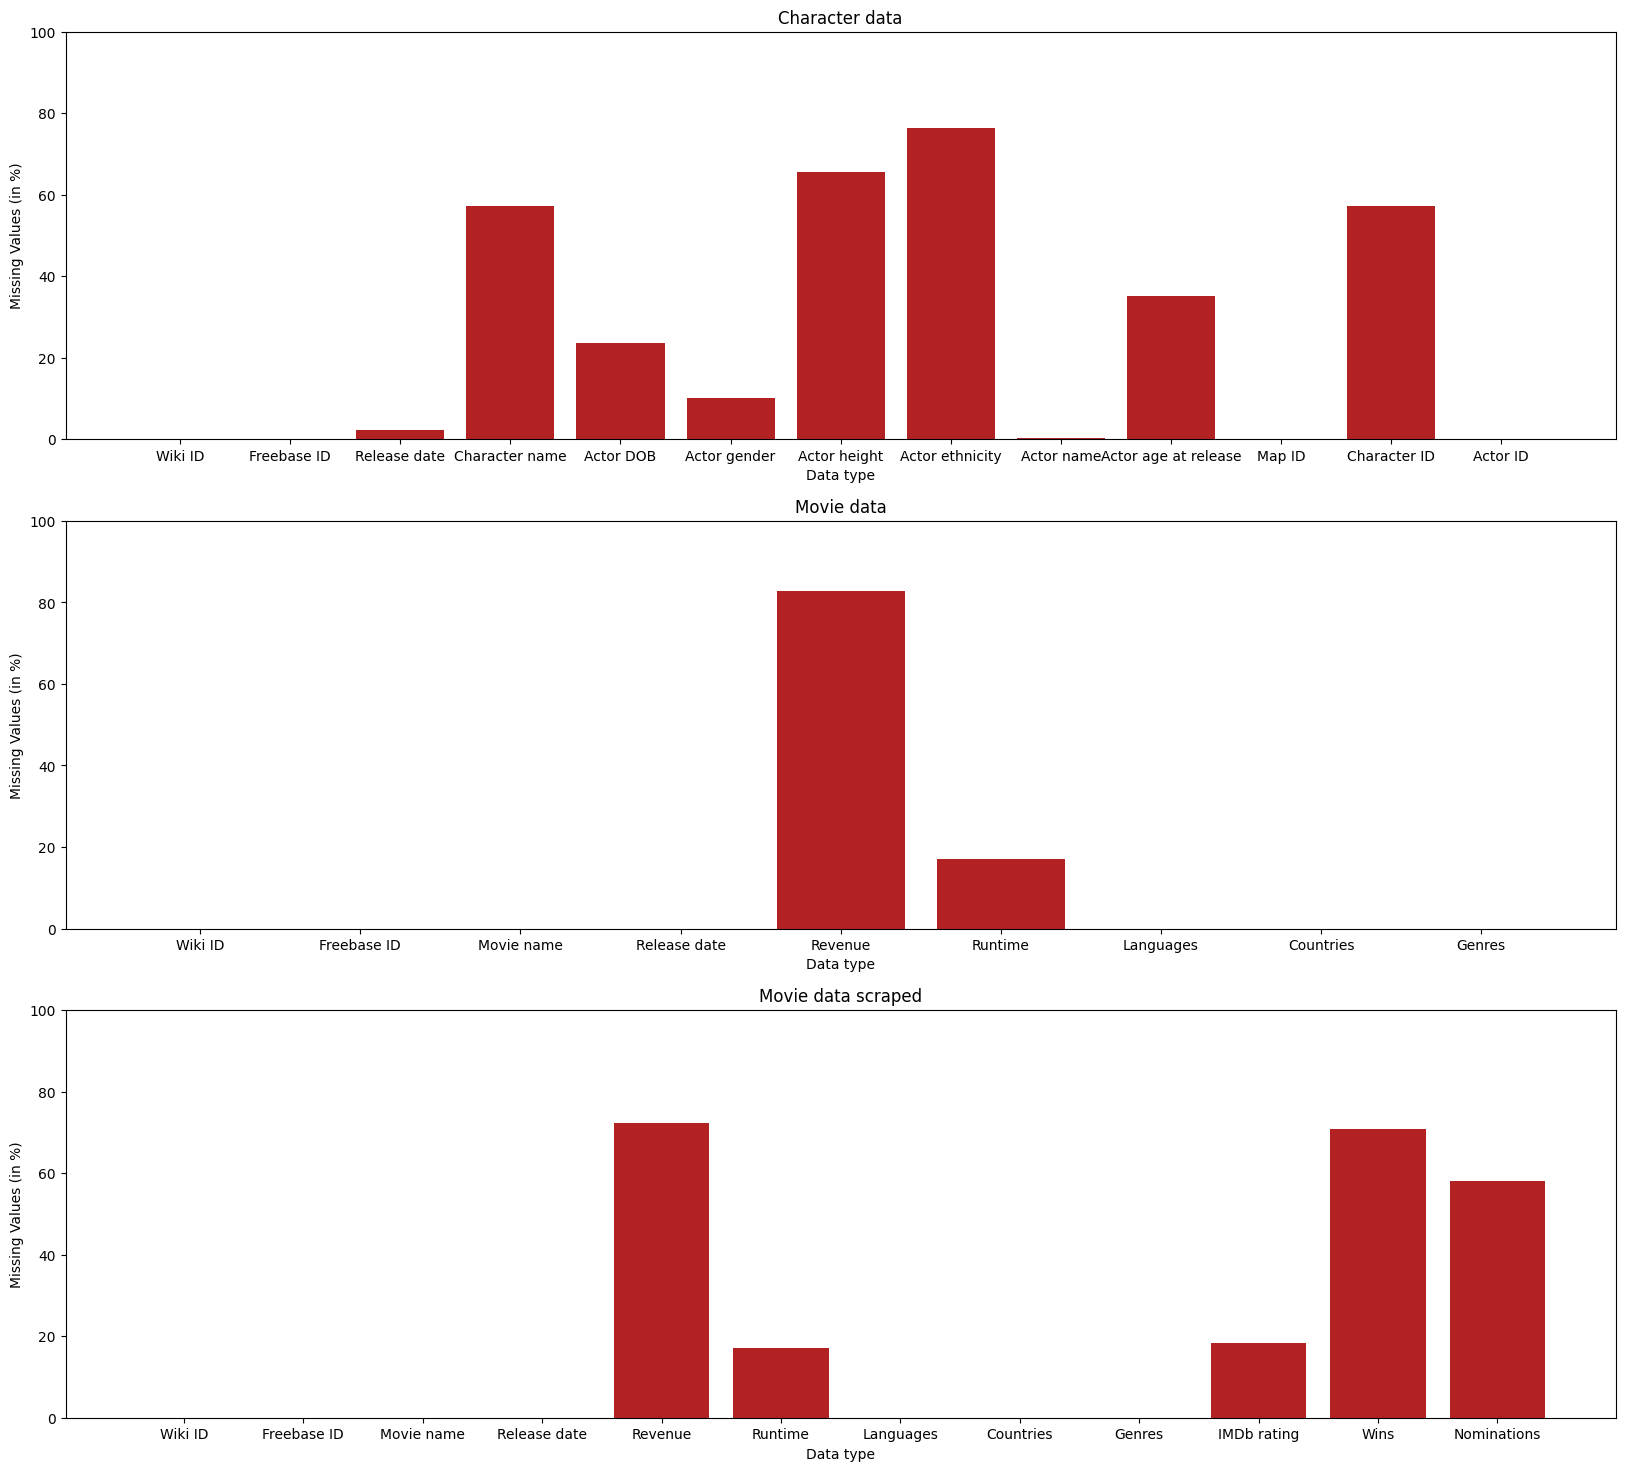

In [26]:
missing_percentage_character_data = (RAW.character_data.isnull().sum() / len (RAW.character_data)) * 100
missing_percentage_movie_data = (RAW.movie_data.isnull().sum() / len (RAW.movie_data)) * 100
missing_percentage_movie_data_scraped = (RAW.movie_data_scraped.isnull().sum() / len (RAW.movie_data_scraped)) * 100
missing_percentage_character_names = (RAW.character_names.isnull().sum() / len (RAW.character_names)) * 100
missing_percentage_tvtropes = (RAW.tvtropes.isnull().sum() / len (RAW.tvtropes)) * 100
missing_percentage_summaries = (RAW.summaries.isnull().sum() / len (RAW.summaries)) * 100

fig, axs = plt.subplots(3, 1, figsize=(20, 18))

# Subplot 1
axs[0].bar(missing_percentage_character_data.index, missing_percentage_character_data.values, color='firebrick')
axs[0].set_title('Character data')
axs[0].set_xlabel('Data type')
axs[0].set_ylabel('Missing Values (in %)')
axs[0].set_ylim(0,100)

# Subplot 2
axs[1].bar(missing_percentage_movie_data.index, missing_percentage_movie_data.values, color='firebrick')
axs[1].set_title('Movie data')
axs[1].set_xlabel('Data type')
axs[1].set_ylabel('Missing Values (in %)')
axs[1].set_ylim(0,100)

# Subplot 3
axs[2].bar(missing_percentage_movie_data_scraped.index, missing_percentage_movie_data_scraped.values, color='firebrick')
axs[2].set_title('Movie data scraped')
axs[2].set_xlabel('Data type')
axs[2].set_ylabel('Missing Values (in %)')
axs[2].set_ylim(0,100)

plt.ylim(0,100)
plt.show()


By looking at the ages of the actors in the character dataframe, we notice that the minimum age at release is -7,896 years old, which is nonsensical. We can therefore filter the ages, for instance only take positive ages:

In [30]:
clean_character_data = RAW.character_data.copy()

clean_character_data = clean_character_data[clean_character_data['Actor age at release'] >= 0]

Then, in the same dataframe, we see that the range of heights (in meters) is [0.61, 510]. We can also consider heights that are below 2.5m:

In [31]:
clean_character_data = clean_character_data[clean_character_data['Actor height'] < 2.5]

We can now save the clean character data; this is the data we will use for every step of the project:

In [32]:
clean_character_data.to_csv("../Clean data/clean_character_data.csv")

For the movie data, we noticed that the movie runtimes are in the interval [0.1, 5700] (in hours). We therefore cut this interval to movies below 5 hours, or 300 minutes. Also, one movie alledgedly was nominated for 634 awards and won 389, so we will cut to keep wins below 200 and nominations below 300:

In [38]:
clean_movie_data = RAW.movie_data_scraped.copy()

clean_movie_data = clean_movie_data[clean_movie_data['Runtime'] < 300]
clean_movie_data = clean_movie_data[clean_movie_data['Wins'] < 200]
clean_movie_data = clean_movie_data[clean_movie_data['Nominations'] < 300]

Since we couldn't retrieve the number of wins and nominations for some movies, we will simply put the missing values (currently represented by None values) at zero:

In [41]:
clean_movie_data['Wins'].fillna(0, inplace=True)
clean_movie_data['Nominations'].fillna(0, inplace=True)

We can now save the dataframe just like we did with the character data:

In [42]:
clean_movie_data.to_csv("../Clean data/clean_movie_data.csv")

## Data visualisation